In [10]:
import screcode
import numpy as np
import scanpy as sc
import sklearn
import pandas as pd
import anndata

import importlib
importlib.reload(screcode)

<module 'screcode' from '/mnt/d/GitHub/RECODE/python/screcode/screcode.py'>

In [2]:
data = pd.read_csv("data/downsamppling_exp.txt",delimiter='\t',index_col=0)
meta = pd.read_csv("data/downsamppling_meta.txt",delimiter='\t',index_col=0)

adata = anndata.AnnData(data,obs=meta,dtype=int)
del data,meta
adata.obs

,batch,batch_number,CellType
b1_exprs_293t_ATGTAAACATCAGC,b1_exprs,1,293t
b1_exprs_293t_CTCGAGCTGAGACG,b1_exprs,1,293t
b1_exprs_293t_ACACGATGCTTATC,b1_exprs,1,293t
b1_exprs_293t_TCAAGGTGGACACT,b1_exprs,1,293t
b1_exprs_293t_AAGAAGACCGACAT,b1_exprs,1,293t
...,...,...,...
b3_exprs_mixed_TTGAATGAATTCCT,b3_exprs,3,293t
b3_exprs_mixed_TACTCCCTTCCCGT,b3_exprs,3,293t
b3_exprs_mixed_CAGCCTTGGGTCTA,b3_exprs,3,293t
b3_exprs_mixed_GCACGGTGCGCTAA,b3_exprs,3,jurkat


AnnData object with n_obs × n_vars = 1500 × 18279
    obs: 'batch', 'batch_number', 'CellType'

In [54]:
recode = screcode.RECODE(version=1)
adata = recode.fit_transform_integration(adata,adata.obs,'batch')

start RECODE for scRNA-seq


2023-03-01 17:13:14,112 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-03-01 17:13:47,453 - harmonypy - INFO - sklearn.KMeans initialization complete.


end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 11194, '#non-significant genes': 7085, '#silent genes': 0, 'ell': 45, 'Elapsed time': '0h 1m 50s 130ms'}


In [56]:
adata.uns['size_factor'] = 10**4
n_PCA = 20

adata.obsm['Raw'] = adata.X
adata.obsm['Raw_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['Raw'].T/np.sum(adata.obsm['Raw'],axis=1)+1).T
adata.obsm['Raw_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['Raw_ss_log'])

adata.obsm['RECODE_ss_log'] = np.log2(adata.uns['size_factor']*adata.obsm['RECODE'].T/np.sum(adata.obsm['RECODE'],axis=1)+1).T
adata.obsm['RECODE_ss_log_PCA'] = sklearn.decomposition.PCA(n_components=n_PCA).fit_transform(adata.obsm['RECODE_ss_log'])

Text(-0.01, 0.5, 'PC2')

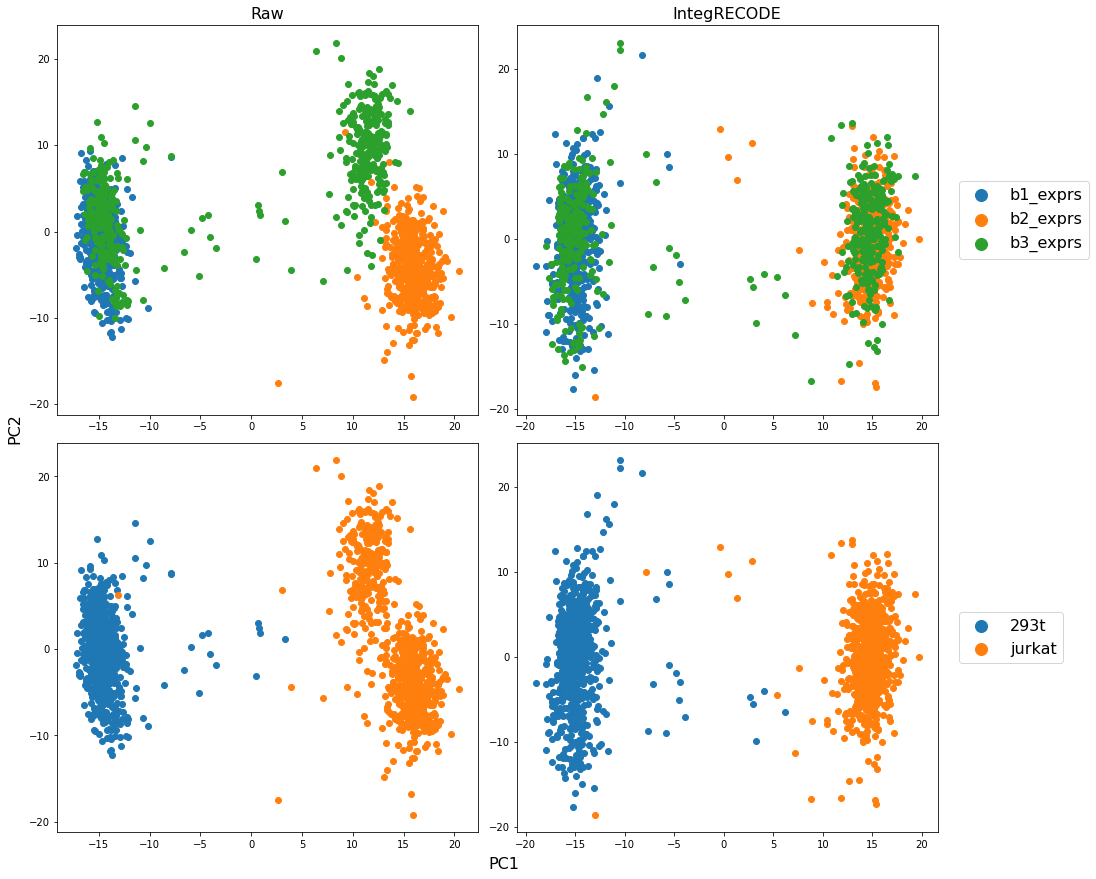

In [58]:
import matplotlib.pyplot as plt

idx_batch = 'batch'
idx_celltype = 'CellType'
fs_title  = 16
fs_label  = 16
fs_legend = 16

plot_color = adata.obs[idx_batch]
plot_color_set = np.unique(plot_color)
plot_data_1 = adata.obsm['Raw_ss_log_PCA']
plot_data_2 = adata.obsm['RECODE_ss_log_PCA']
fig,ax = plt.subplots(2,2,figsize=(15,12),tight_layout=True)
ax_ = ax[0,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_.set_title('Raw',fontsize=fs_title)
ax_ = ax[0,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_.set_title('IntegRECODE',fontsize=fs_title)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
plot_color = adata.obs[idx_celltype]
plot_color_set = np.unique(plot_color)
ax_ = ax[1,0]
for b in plot_color_set:
    ax_.scatter(plot_data_1[plot_color==b,0],plot_data_1[plot_color==b,1],label=b)
ax_ = ax[1,1]
for b in plot_color_set:
    ax_.scatter(plot_data_2[plot_color==b,0],plot_data_2[plot_color==b,1],label=b)
ax_.legend(bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad=0, fontsize=fs_legend,markerscale=2)
fig.text(0.45, -0.01, 'PC1', ha='center',fontsize=fs_label)
fig.text(-0.01, 0.5, 'PC2', va='center', rotation='vertical',fontsize=fs_label)